    Code source: Gaël Varoquaux 
    Modified by Lars "Data Mining" Bakke Krogvig
    License: BSD 3 clause
    
# Iris dataset

In [1]:
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import sklearn.datasets
import sklearn.decomposition
import sklearn.neighbors
import sklearn.cross_validation
import sklearn.metrics

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

%matplotlib inline 

Vi importerer og plotter dataene

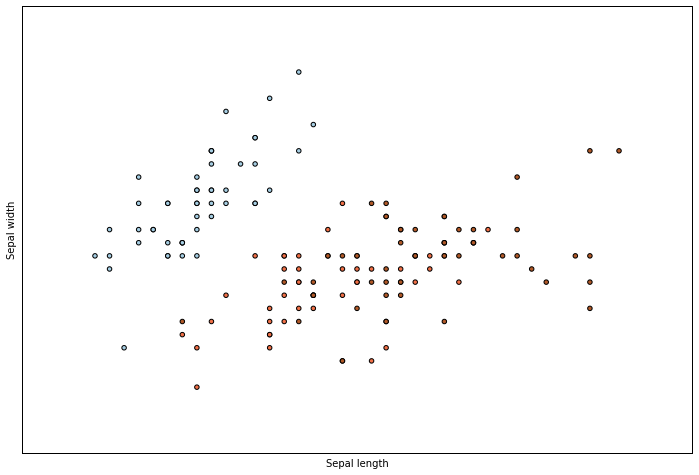

In [2]:
# Her laster vi datasettet
iris = sklearn.datasets.load_iris()
X = iris.data[:, :2] 
Y = iris.target

# Her plotter vi
plt.figure(1, figsize=(12, 8))
plt.clf()

plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

x_min = X[:, 0].min() - .5
x_max = X[:, 0].max() + .5
y_min = X[:, 1].min() - .5
y_max = X[:, 1].max() + .5

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(());

La oss for moroskyld plotte de tre første PCA-komponentene i et 3d-plot

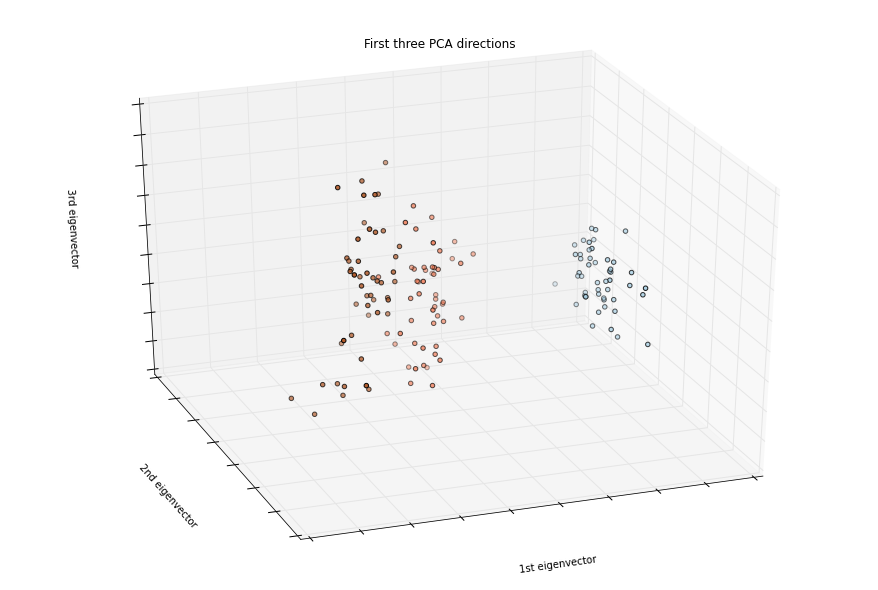

In [3]:
# Her gjør vi PCA
X_reduced = sklearn.decomposition.PCA(n_components=3).fit_transform(iris.data)

# Her plotter vi
fig = plt.figure(2, figsize=(12, 8))
ax = Axes3D(fig, elev=-150, azim=110)

ax.scatter(X_reduced[:, 0], 
           X_reduced[:, 1], 
           X_reduced[:, 2], 
           c=Y, 
           cmap=plt.cm.Paired)

ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

# Øving 3, oppgave 2
k-Nearest Neighbours on the iris data set.

First, define a function to run a kNN classification and return the accuracy of the model

In [4]:
def kNN(k, X_train, Y_train, X_test, Y_test):
    '''
    This function performs a kNN classification
    '''
    
    # Set up model
    clf = sklearn.neighbors.KNeighborsClassifier(k, weights='uniform')
    
    # Train model
    clf.fit(X_train, Y_train)
    
    # Apply model
    Y_pred = clf.predict(X_test)
    
    # Return accuracy
    return sklearn.metrics.accuracy_score(Y_test, Y_pred)

Then define a function that runs k-fold cross validation using the previous function

In [5]:
def kNN_kfold(k, folds, X, Y):
    '''
    This function performs kNN classification with k-fold cross validation
    '''
    
    # Create k lists of indices for training and test sets
    kfold = sklearn.cross_validation.KFold(n=X.shape[0], 
                                           n_folds=folds, 
                                           shuffle=True,
                                           random_state=None)
    
    # List for accuracy scores for each fold
    accuracy_scores = []
        
    # Loop over k folds
    for (idx_train, idx_test) in kfold:
        
        # Create training and test sets
        X_train = X[idx_train]
        Y_train = Y[idx_train]
        X_test = X[idx_test]
        Y_test = Y[idx_test]
            
        # Train and test the model for the fold
        accuracy = kNN(k, X_train, Y_train, X_test, Y_test)
            
        # Append the score for the fold to a list
        accuracy_scores.append(accuracy)
    
    # Return mean accuracy score
    return np.mean(accuracy_scores)

Why not also define a function that repeats k-fold cross validation n times and returns the average result

In [6]:
def kNN_kFold_nrep(k, folds, reps, X, Y):
    '''
    This function repeats kNN classification with k-fold cross validation n times
    '''

    # List for mean accuracy scores in each k-fold cross validation
    mean_accuracy_scores = []

    # Repeat k-fold cross validation n_reps times
    for i in xrange(reps):
        
        # Perform classification with k-fold cross validation
        mean_accuracy = kNN_kfold(k, folds, X, Y)
        
        # Append the average accuracy to a list
        mean_accuracy_scores.append(mean_accuracy)
    
    # Return the mean mean accuracy score
    return np.mean(mean_accuracy_scores)

### Run the workflow
Let's try kNN for 
\begin{equation}
k = 1, \ldots, 50
\end{equation}
Here we go:

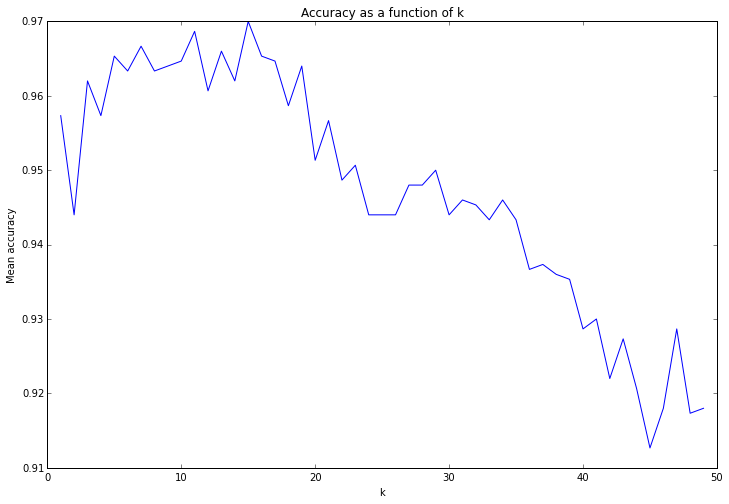

In [7]:
# Values of k
K = range(1,50)

# List for mean accuracies for each k
result = []

for k in K:
    accuracy = kNN_kFold_nrep(k=k,
                              folds=5,
                              reps=10,
                              X=iris.data,
                              Y=iris.target)
    
    result.append(accuracy)

plt.figure(figsize=(12,8))
plt.plot(K, result)

plt.title('Accuracy as a function of k')
plt.xlabel('k')
plt.ylabel('Mean accuracy');

### Example plot
Let's conclude with a nice looking plot (http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html)

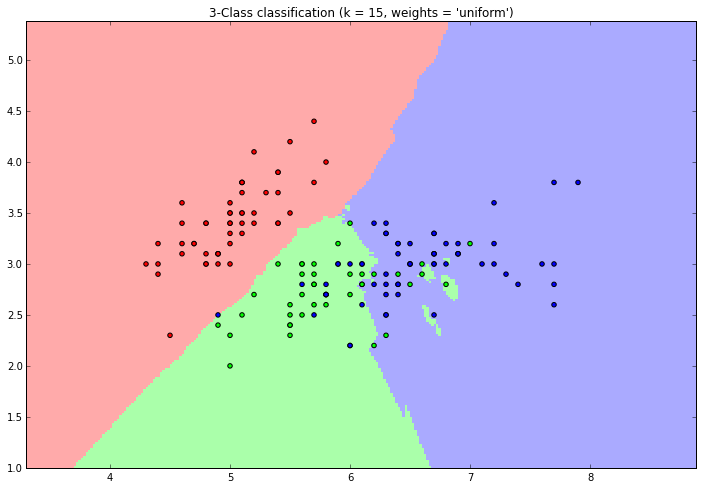

In [8]:
k0 = 15

h = .02  # step size in the mesh

X = iris.data[:, :2]
y = iris.target

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# we create an instance of Neighbours Classifier and fit the data.
clf = sklearn.neighbors.KNeighborsClassifier(k0, weights='uniform')
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(12,8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i, weights = '%s')" % (k0, 'uniform'))

plt.show()